In [1]:
# Importing the required libraries for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import itertools
import warnings
warnings.filterwarnings("ignore")

In [21]:

def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else:
            #df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [22]:
%%time

train = pd.read_csv('pubg - Dr. Darshan Ingle.csv')
train = reduce_mem_usage(test)
print( train.shape)

NameError: name 'test' is not defined

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               10000 non-null  object 
 1   groupId          10000 non-null  object 
 2   matchId          10000 non-null  object 
 3   assists          10000 non-null  int64  
 4   boosts           10000 non-null  int64  
 5   damageDealt      10000 non-null  float64
 6   DBNOs            10000 non-null  int64  
 7   headshotKills    10000 non-null  int64  
 8   heals            10000 non-null  int64  
 9   killPlace        10000 non-null  int64  
 10  killPoints       10000 non-null  int64  
 11  kills            10000 non-null  int64  
 12  killStreaks      10000 non-null  int64  
 13  longestKill      10000 non-null  float64
 14  matchDuration    10000 non-null  int64  
 15  matchType        10000 non-null  object 
 16  maxPlace         10000 non-null  int64  
 17  numGroups    

In [5]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2f262dd9795e60,78437bcd91d40e,d5db3a49eb2955,0,0,0.0,0,0,0,92,...,0,0.0,0,0.0,0,0,0.0,0,1470,0.0000
1,a32847cf5bf34b,85b7ce5a12e10b,65223f05c7fdb4,0,0,163.2,1,1,0,42,...,0,0.0,0,0.0,0,0,132.7,2,1531,0.2222
2,1b1900a9990396,edf80d6523380a,1cadec4534f30a,0,3,278.7,2,1,8,16,...,3,0.0,0,0.0,0,0,3591.0,10,0,0.8571
3,f589dd03b60bf2,804ab5e5585558,c4a5676dc91604,0,0,191.9,1,0,0,31,...,0,0.0,0,0.0,0,0,332.7,3,0,0.3462
4,c23c4cc5b78b35,b3e2cd169ed920,cd595700a01bfa,0,0,100.0,1,0,0,87,...,0,0.0,0,0.0,0,0,252.7,3,1557,0.0690


In [6]:
train.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
9995,ef4f474acd8e85,2eca2a8391f75d,492ecdfae90b46,0,3,204.5,1,0,0,17,...,3,0.0,0,0.0,0,0,1648.00,4,1471,0.8333
9996,cf0bf82fb4d80e,2eaf2765f93adb,14bffd71e96320,0,0,0.0,0,0,0,49,...,0,0.0,0,0.0,0,0,897.10,6,1500,0.7174
9997,a0a31a0b1dcbe1,8d50c64ccc5071,147e4bbb62e3bb,0,0,0.0,0,0,0,83,...,0,0.0,0,0.0,0,0,188.20,2,1434,0.2083
9998,f6874657399d69,d31843d7e62ccb,662567dcf280f5,0,0,0.0,0,0,0,82,...,0,0.0,0,0.0,0,0,108.10,5,1534,0.2449
9999,90359b0b8f8b0d,61d5b1bb8da43f,258bfa48d88014,0,0,0.0,0,0,0,78,...,0,0.0,0,0.0,0,0,53.36,1,0,0.1875


In [7]:
for i in ['Id','groupId','matchId']:
    print(f'unique [{i}] count:', train[i].nunique())

unique [Id] count: 10000
unique [groupId] count: 9973
unique [matchId] count: 8995


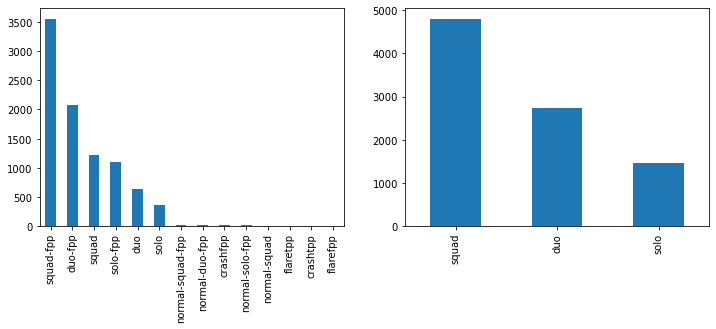

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

train.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[0])

mapper = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'
train['matchType'] = train['matchType'].apply(mapper)
train.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[1])

In [9]:
def mergeList(list1,list2):
    return list(itertools.product(list1,list2))
match = train.groupby(['matchType','matchId']).size().to_frame('players in match')
group = train.groupby(['matchType','matchId','groupId']).size().to_frame('players in group')
pd.concat([match.groupby('matchType').describe()[mergeList(['players in match'],['min','mean','max'])], 
           group.groupby('matchType').describe()[mergeList(['players in group'],['min','mean','max'])]], axis=1)

players in match                players in group              
                       min      mean  max              min     mean  max
matchType                                                               
duo                    1.0  1.100475  3.0              1.0  1.00133  2.0
solo                   1.0  1.117364  3.0              1.0  1.00000  1.0
squad                  1.0  1.116434  4.0              1.0  1.00431  2.0

In [10]:
print(group['players in group'].nlargest(5))

matchType  matchId         groupId       
duo        2eecf5248d3dab  d733d302ceba2f    2
           8c363d469d479f  fc766360fdee59    2
           b6a0006b0a56ad  9041ff1635fcd5    2
           d32160446f79db  1653af2eb24e68    2
squad      08fa6611d8ab67  96b565cef09052    2
Name: players in group, dtype: int64


In [11]:
''' ex) matchId=='3e029737889ce9', groupId=='b8275198faa03b'
'''
subset = train[train['matchId']=='3e029737889ce9']
sub_grp = subset[subset['groupId']=='b8275198faa03b']

print('matchId ==\'3e029737889ce9\' & groupId ==\'b8275198faa03b\'')
print('-'*50)
print('players:',len(subset))
print('groups:',subset['groupId'].nunique())
print('numGroups:',subset['numGroups'].unique())
print('maxPlace:',subset['maxPlace'].unique())
print('-'*50)
print('max-group players:',len(sub_grp))
print('max-group winPlacePerc:',sub_grp['winPlacePerc'].unique())
print('-'*50)
print('winPlacePerc:',subset['winPlacePerc'].sort_values().unique())

matchId =='3e029737889ce9' & groupId =='b8275198faa03b'
--------------------------------------------------
players: 0
groups: 0
numGroups: []
maxPlace: []
--------------------------------------------------
max-group players: 0
max-group winPlacePerc: []
--------------------------------------------------
winPlacePerc: []


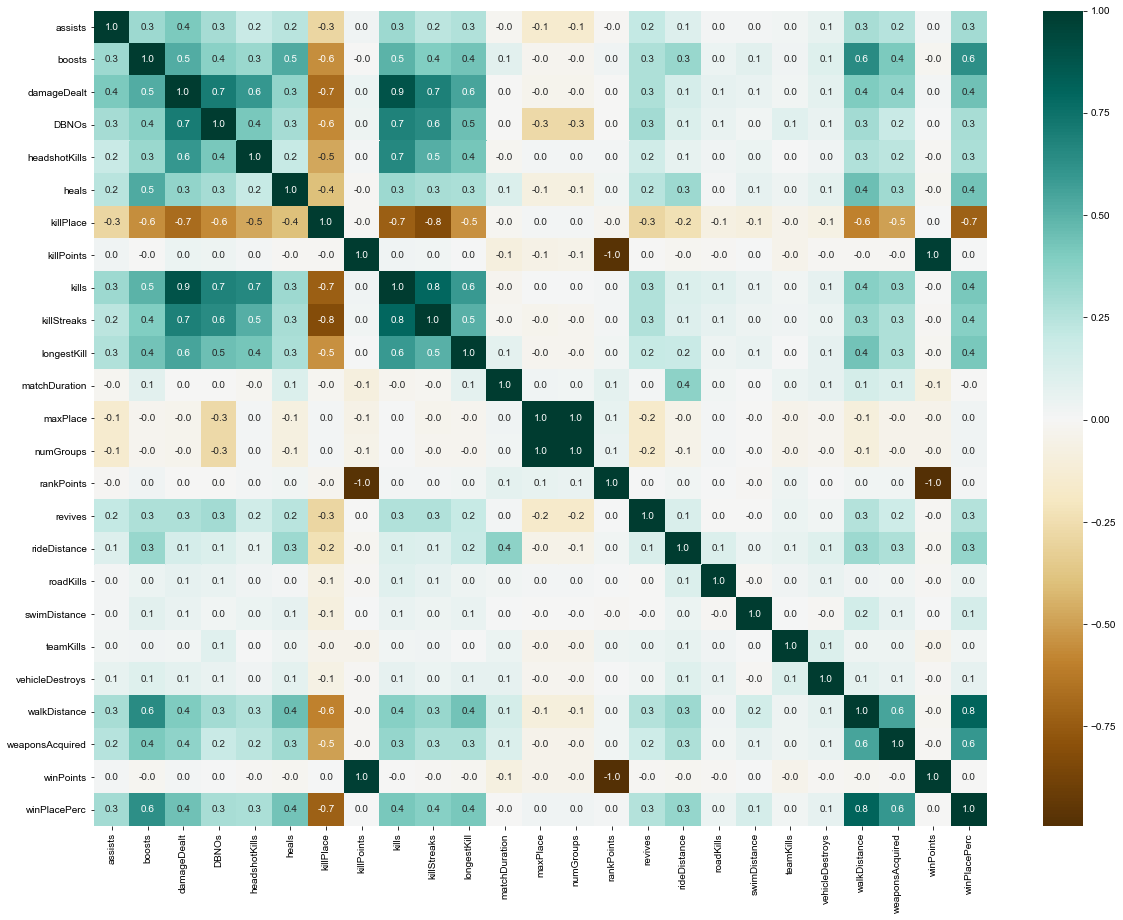

In [12]:
corr = train.corr()
f,ax = plt.subplots(figsize=(20, 15))
sns.heatmap(train.corr(), annot=True, fmt= '.1f',ax=ax, cmap="BrBG")
sns.set(font_scale=1.25)
plt.show()

In [13]:
print("On an average a person kills {:.4f} players, 99% of people have {} kills or less, while the maximum kills ever recorded is {}.".format(train['kills'].mean(),train['kills'].quantile(0.99), train['kills'].max()))

On an average a person kills 0.9134 players, 99% of people have 7.0 kills or less, while the maximum kills ever recorded is 35.


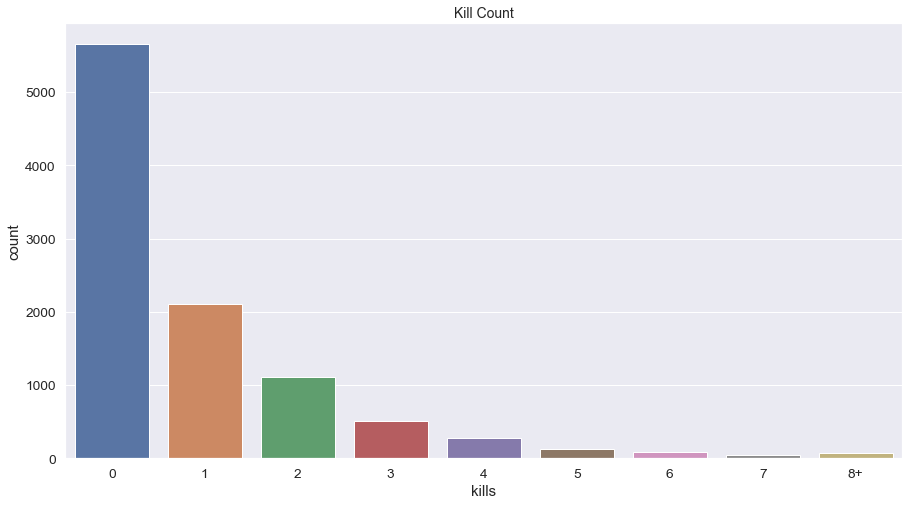

In [14]:
data = train.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,8))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=14)
plt.show()

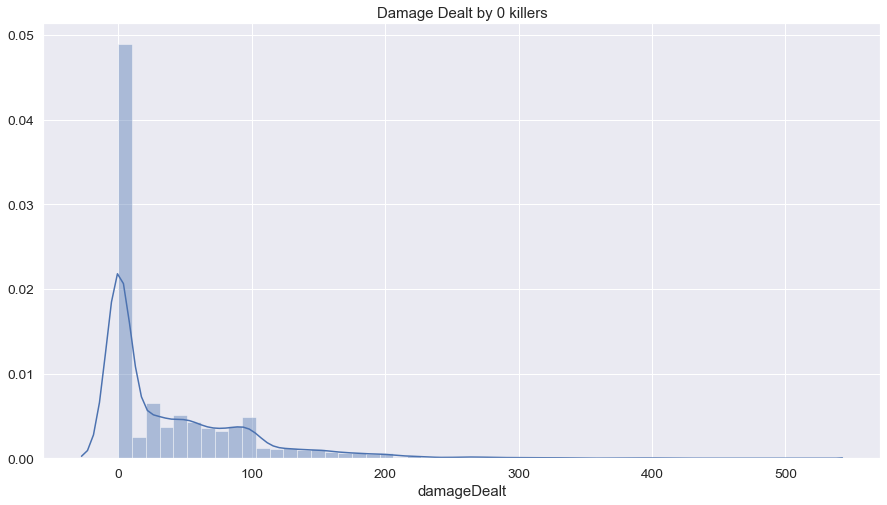

In [15]:
data = train.copy()
data = data[data['kills']==0]
plt.figure(figsize=(15,8))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.distplot(data['damageDealt'])
plt.show()

In [16]:
print("A total of {} players ({:.4f}%) have won without a single kill!".format(len(data[data['winPlacePerc']==1]), 100*len(data[data['winPlacePerc']==1])/len(train)))
data1 = train[train['damageDealt'] == 0].copy()
print("A total of {} players ({:.4f}%) have won without dealing damage!".format(len(data1[data1['winPlacePerc']==1]), 100*len(data1[data1['winPlacePerc']==1])/len(train)))

A total of 30 players (0.3000%) have won without a single kill!
A total of 12 players (0.1200%) have won without dealing damage!


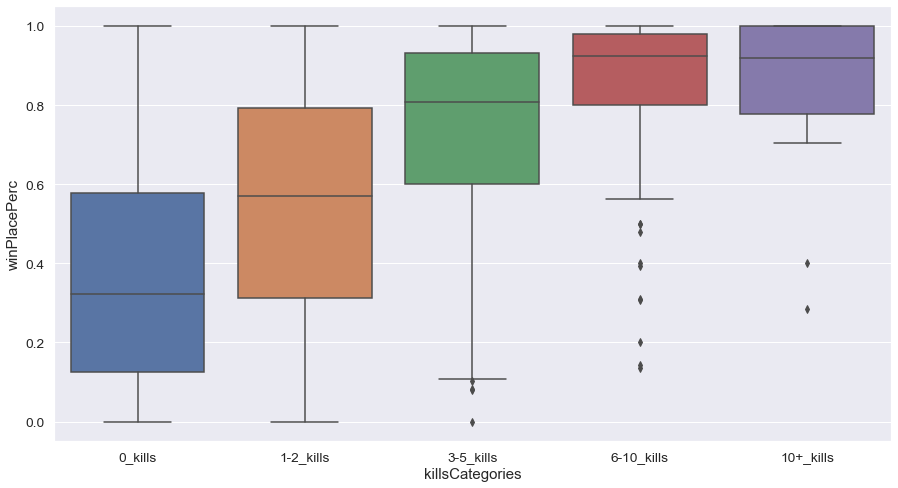

In [17]:
kills = train.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

# running analysis

In [18]:
print("{} players ({:.4f}%) walked 0 meters. This means that either they die before even taking a step or they have just joined the game but are away from keyboard (more possible).".format(len(data[data['walkDistance'] == 0]), 100*len(data1[data1['walkDistance']==0])/len(train)))

232 players (2.1200%) walked 0 meters. This means that either they die before even taking a step or they have just joined the game but are away from keyboard (more possible).


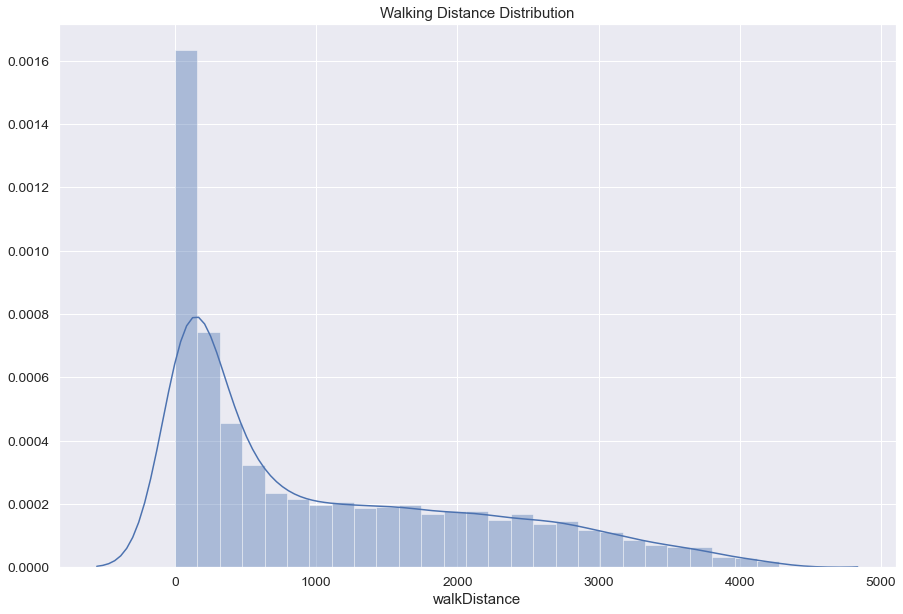

In [19]:
data = train.copy()
data = data[data['walkDistance'] < train['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(data['walkDistance'])
plt.show()

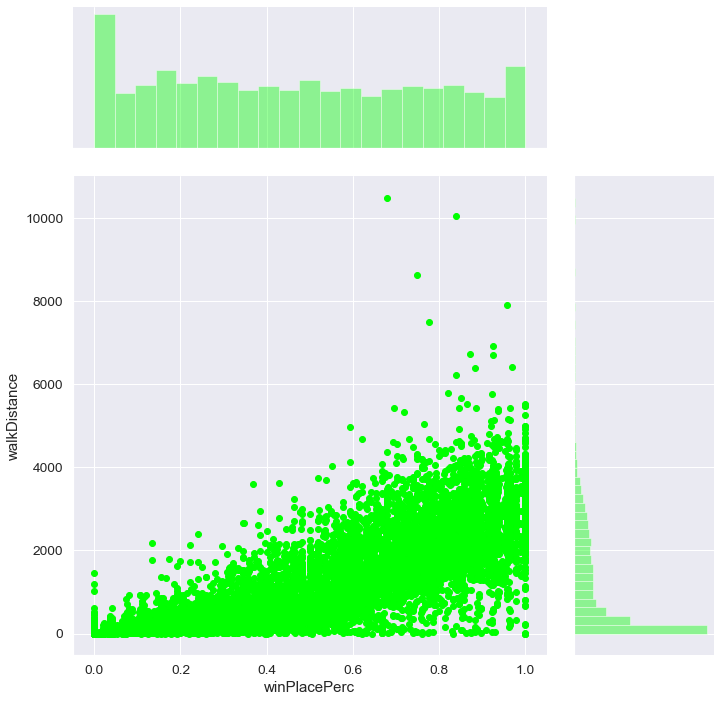

In [20]:
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=train, height=10, ratio=3, color="lime")
plt.show()

In [23]:
print("An average person drives for {:.1f}m, 99% of people have drived {}m or less, while THE RIDER rode for {}m.".format(train['rideDistance'].mean(), train['rideDistance'].quantile(0.99), train['rideDistance'].max()))

An average person drives for 600.7m, 99% of people have drived 7133.170000000004m or less, while THE RIDER rode for 28780.0m.


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

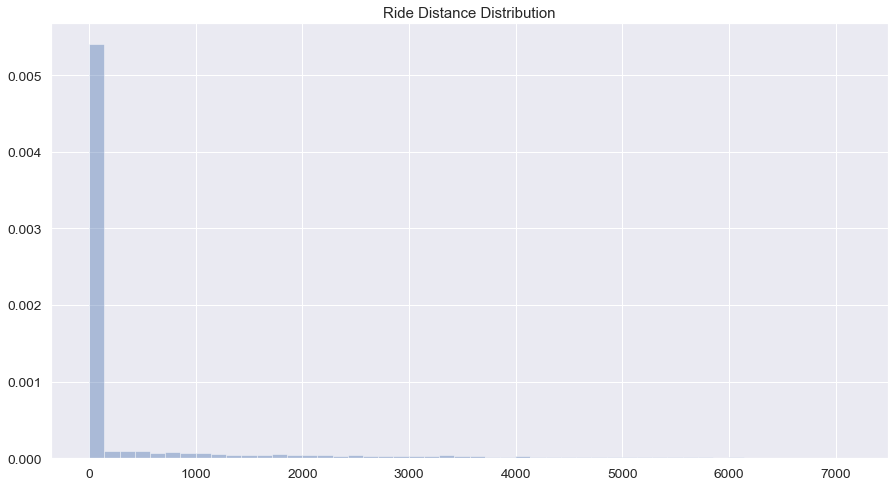

In [24]:
data = train.copy()
data = data[data['rideDistance'] < train['rideDistance'].quantile(0.99)]
plt.figure(figsize=(15,8))
plt.title("Ride Distance Distribution",fontsize=15)
sns.distplot(data['rideDistance'])
plt.show()

In [25]:
print("{} players ({:.4f}%) drived for 0 meters. This means that they like trekking more than riding.".format(len(data[data['rideDistance'] == 0]), 100*len(data1[data1['rideDistance']==0])/len(train)))

7499 players (23.2500%) drived for 0 meters. This means that they like trekking more than riding.


In [26]:
#Analysing Riding: Effect of Riding on Winning Percentage

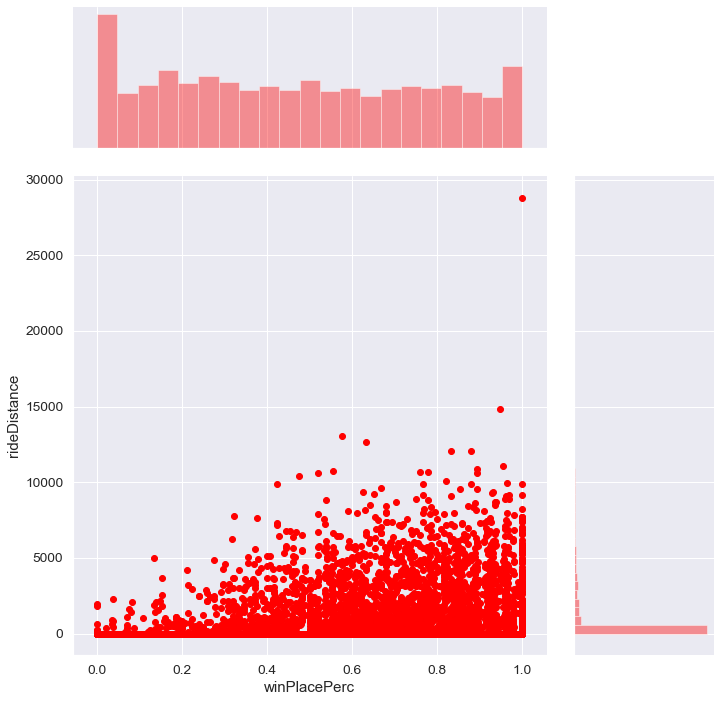

In [27]:
sns.jointplot(x="winPlacePerc", y="rideDistance", data=train, height=10, ratio=3, color="red")
plt.show()

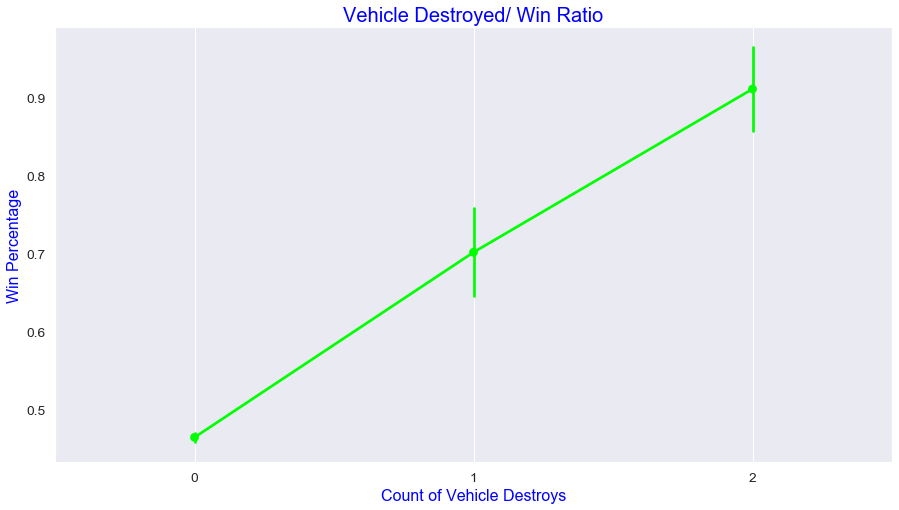

In [28]:
f,ax1 = plt.subplots(figsize =(15,8))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=data,color='lime',alpha=0.5)
plt.xlabel('Count of Vehicle Destroys',fontsize = 16,color='blue')
plt.ylabel('Win Percentage',fontsize = 16,color='blue')
plt.title('Vehicle Destroyed/ Win Ratio',fontsize = 20,color='blue')
plt.grid()
plt.show()

In [29]:
print("In the game on an average a person uses {:.1f} heal items, 99% of people use {} or less, while the doctor used {}.".format(train['heals'].mean(), train['heals'].quantile(0.99), train['heals'].max()))
print("In the game on an average a person uses {:.1f} boost items, 99% of people use {} or less, while the doctor used {}.".format(train['boosts'].mean(), train['boosts'].quantile(0.99), train['boosts'].max()))

In the game on an average a person uses 1.4 heal items, 99% of people use 12.0 or less, while the doctor used 31.
In the game on an average a person uses 1.1 boost items, 99% of people use 7.0 or less, while the doctor used 18.


# Analysing Healing and Boosting: Effect of Healing & Boosting on Winning Percentage¶

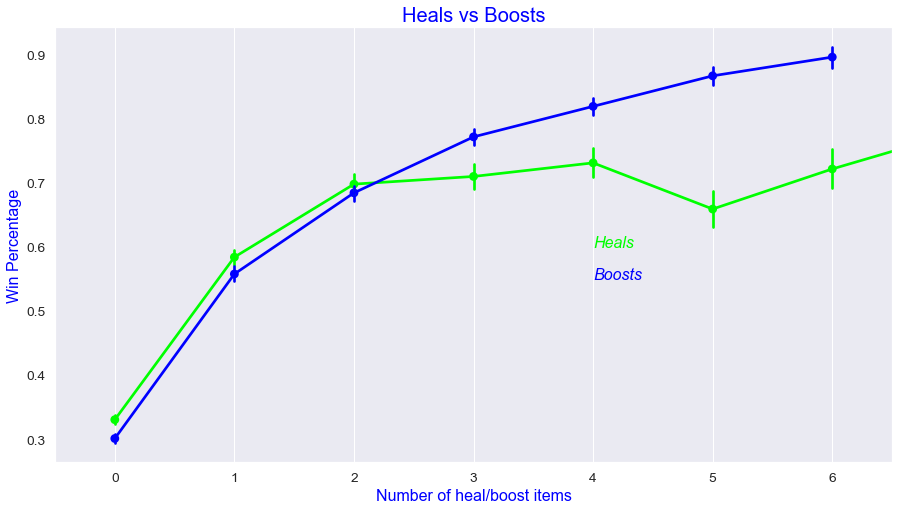

In [30]:
data = train.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(15,8))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='lime',fontsize = 16,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 16,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 16,color='blue')
plt.ylabel('Win Percentage',fontsize = 16,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()
plt.show()

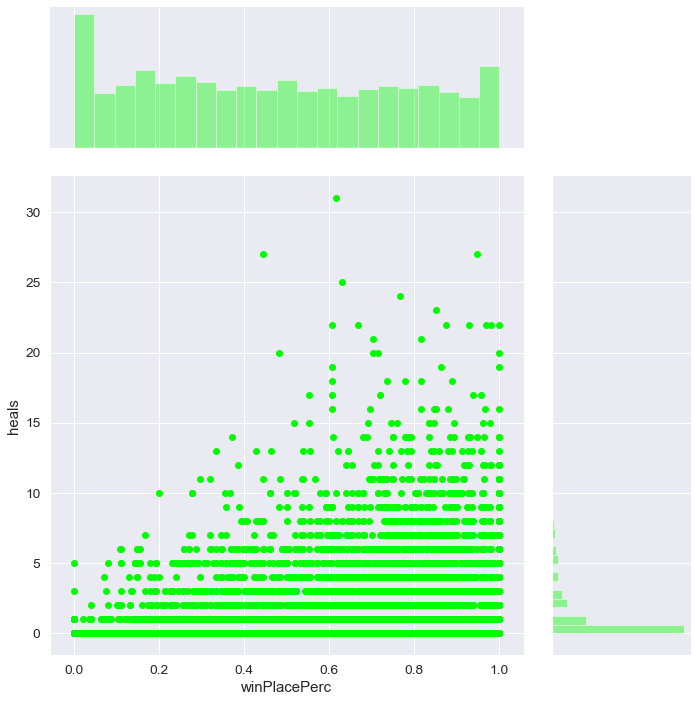

In [31]:
sns.jointplot(x="winPlacePerc", y="heals", data=train, height=10, ratio=3, color="lime")
plt.show()

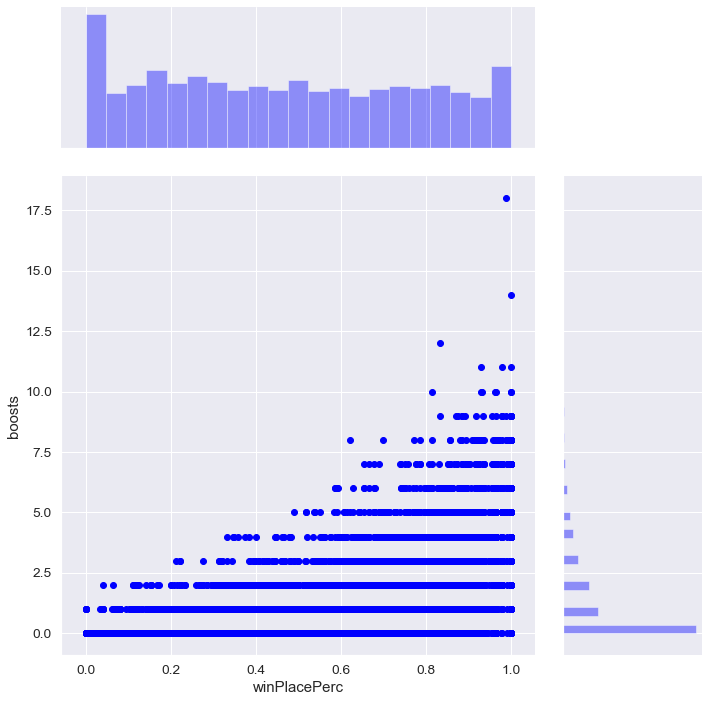

In [32]:
sns.jointplot(x="winPlacePerc", y="boosts", data=train, height=10, ratio=3, color="blue")
plt.show()

In [33]:
solos = train[train['numGroups']>50] #Solo game played by more than 50 different groups
duos = train[(train['numGroups']>25) & (train['numGroups']<=50)] #Duo game can consist of a maximum of 50 groups(50x2=100) 
squads = train[train['numGroups']<=25] # Squad game can consist a maximum of 25 groups(25x4=100)
print("{} ({:.2f}%) of games are solo, {} ({:.2f}%) are duo and {} ({:.2f}%) are squad games.".format(len(solos), 100*len(solos)/len(train), len(duos), 100*len(duos)/len(train), len(squads), 100*len(squads)/len(train),))

1601 (16.01%) of games are solo, 7432 (74.32%) are duo and 967 (9.67%) are squad games.


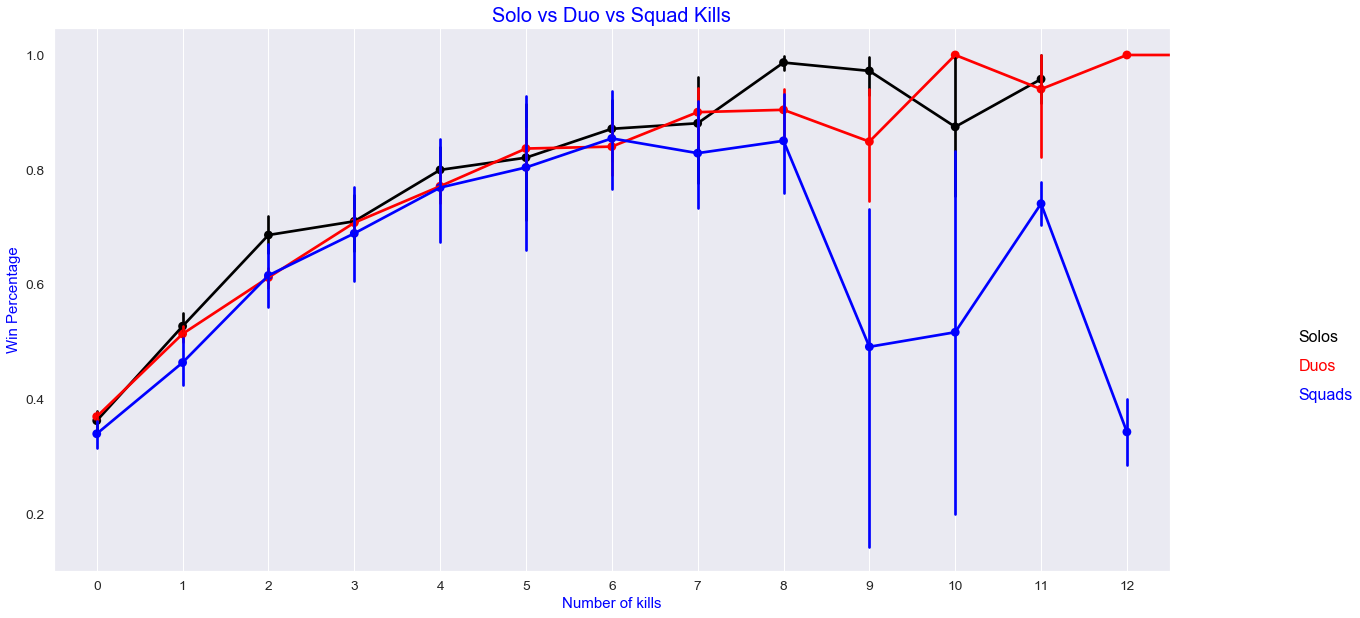

In [34]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='black',alpha=0.6)
sns.pointplot(x='kills',y='winPlacePerc',data=duos,color='red',alpha=0.6)
sns.pointplot(x='kills',y='winPlacePerc',data=squads,color='blue',alpha=0.6)
plt.text(14,0.5,'Solos',color='black',fontsize = 16)
plt.text(14,0.45,'Duos',color='red',fontsize = 16)
plt.text(14,0.4,'Squads',color='blue',fontsize = 16)
plt.xlabel('Number of kills',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20,color='blue')
plt.grid()
plt.show()

In [35]:
# Check row with NaN value
train[train['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


In [36]:
train.drop(train[train['winPlacePerc'].isnull()].index, inplace=True)

In [38]:
train.shape

(10000, 29)

In [39]:
# Engineer a new feature _totalDistance
train['_totalDistance'] = train['rideDistance'] + train['walkDistance'] + train['swimDistance']

In [40]:
# Engineer _headshot_rate feature --- headshots made per kill
train['_headshot_rate'] = train['headshotKills'] / train['kills']
train['_headshot_rate'] = train['_headshot_rate'].fillna(0)

In [41]:
#Defining some functions for plotting graphs, we will be needing a lot of countplot and distplot
def show_countplot(column):
    plt.figure(figsize=(15,8))
    sns.countplot(data=train, x=column).set_title(column)
    plt.show()
    
def show_distplot(column):
    plt.figure(figsize=(15, 8))
    sns.distplot(train[column], bins=50)

# kills

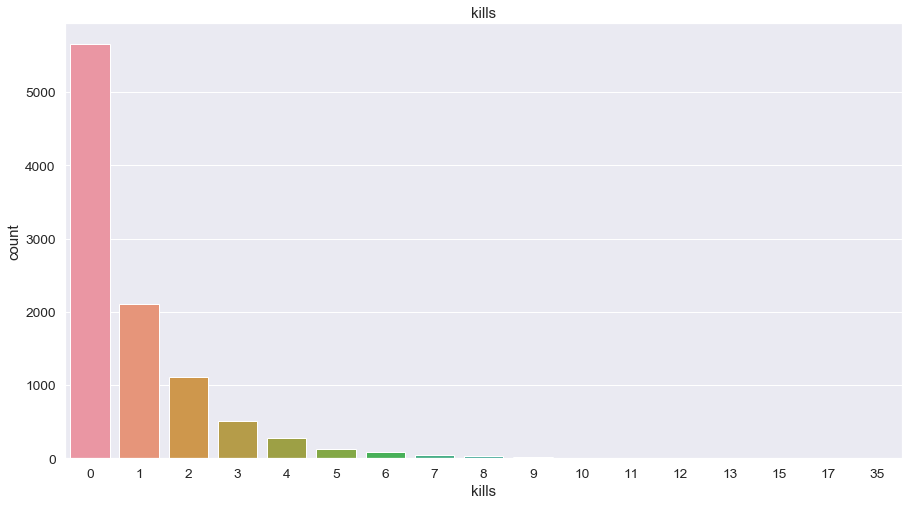

In [42]:
show_countplot('kills')

In [43]:
# Is it even possible to kill more than 40 people by acquiring more than 55 weapons and maintaining a total distance of less than 100m?
train[(train['kills'] >= 40) & (train['weaponsAcquired'] > 55) & (train['_totalDistance'] < 100.0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate


In [44]:
# Is it even possible to kill more than 40 people without using any heals?
train[(train['kills'] >= 40) & (train['heals'] == 0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate


In [45]:
# Drop 'fraudsters' with inhumane kill counts
train.drop(train[(train['kills'] >= 40) & (train['weaponsAcquired'] > 55) & (train['_totalDistance'] < 100.0)].index, inplace=True)
train.drop(train[(train['kills'] >= 40) & (train['heals'] == 0)].index, inplace=True)

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

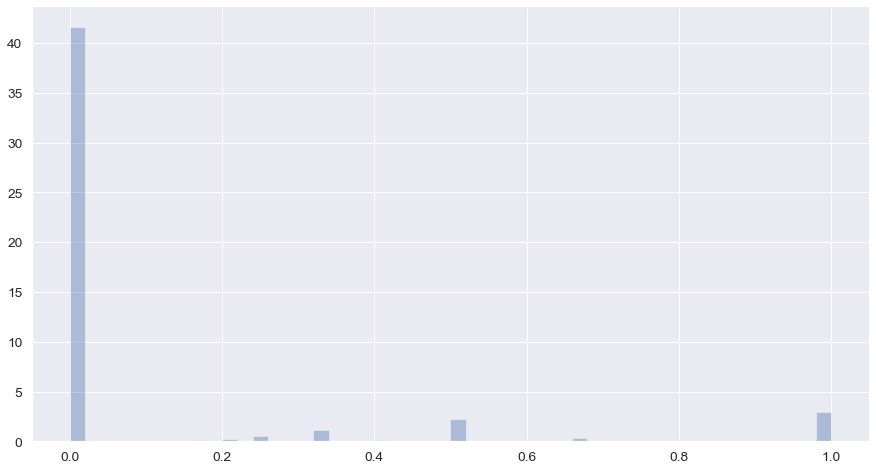

In [46]:
# Plot the distribution of headshot_rate
show_distplot('_headshot_rate')

In [47]:
# List of Hitman who made more than 10 kills and all the kills were done by headshot(perfect kill)
display(train[(train['_headshot_rate'] == 1) & (train['kills'] >=10)].shape)
train[(train['_headshot_rate'] == 1) & (train['kills'] >= 10)].head(10)

(0, 31)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate


In [48]:
# Create feature killsWithoutMoving
train['_killsWithoutMoving'] = ((train['kills'] > 0) & (train['_totalDistance'] == 0))
# Check players who kills without moving
display(train[train['_killsWithoutMoving'] == True].shape)
train[train['_killsWithoutMoving'] == True].head(10)

(2, 32)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
1442,e95c430fb5bc20,ea800ea1aa6efa,ed092b499ac27d,3,0,1207.0,0,3,5,16,...,0.0,0,0,0.0,33,1500,0.4000,0.0,0.25,True
3556,1475fbb9757ed3,cd60dad7b1b60a,da426e2e23c065,0,0,100.0,0,0,0,48,...,0.0,0,0,0.0,1,0,0.0215,0.0,0.00,True


In [49]:
train.drop(train[train['_killsWithoutMoving'] == True].index, inplace=True)

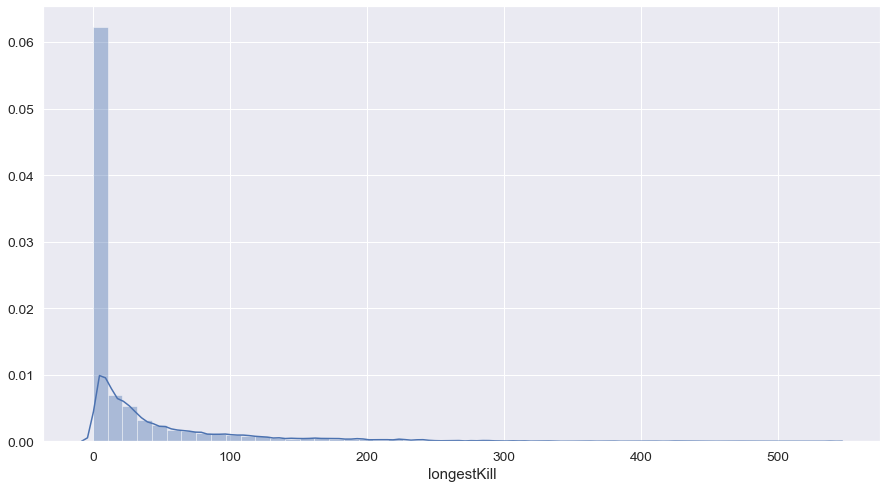

In [50]:
show_distplot('longestKill')

In [51]:
train[train['longestKill'] >= 1000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving


In [52]:
# Drop longestKill 'fraudsters'
train.drop(train[train['longestKill'] >= 1000].index, inplace=True)

In [53]:
# Players who got more than 10 roadKills
train[train['roadKills'] > 10]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving


In [54]:
# Drop roadKill 'fraudsters'
train.drop(train[train['roadKills'] > 10].index, inplace=True)

In [55]:
train[['walkDistance', 'rideDistance', 'swimDistance']].describe()

,walkDistance,rideDistance,swimDistance
count,9998.000000,9998.000000,9998.000000
mean,1130.236328,600.813843,4.386793
std,1168.603394,1525.054443,30.890656
min,0.000000,0.000000,0.000000
25%,151.850002,0.000000,0.000000
50%,651.200012,0.000000,0.000000
75%,1923.750000,0.000925,0.000000
max,10490.000000,28780.000000,971.200012


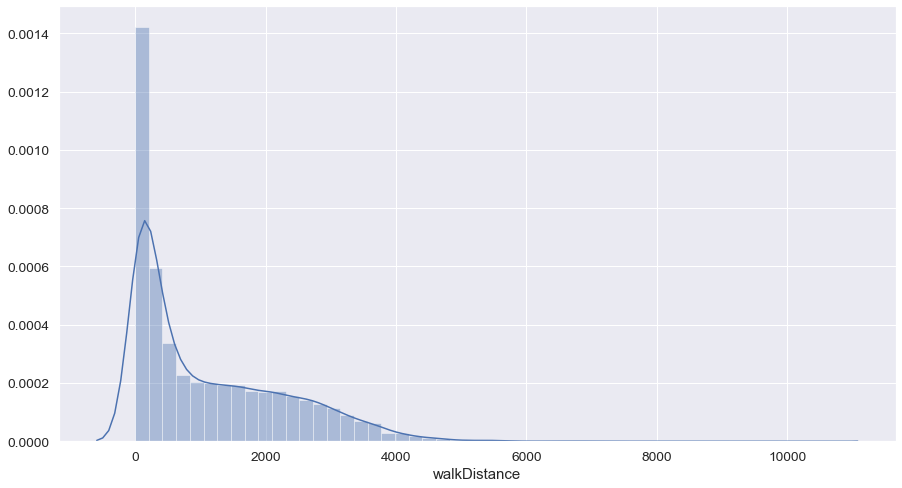

In [56]:
show_distplot('walkDistance')

In [57]:
#Travel Lust and Wandrer ---> They just play to roam around and explore places without killing anyone and how can they travel 13kms in the game?
train[(train['walkDistance'] >= 13000) & (train['kills'] == 0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving


In [58]:
# Drop walking anomalies
train.drop(train[(train['walkDistance'] >= 13000) & (train['kills'] == 0)].index, inplace=True)

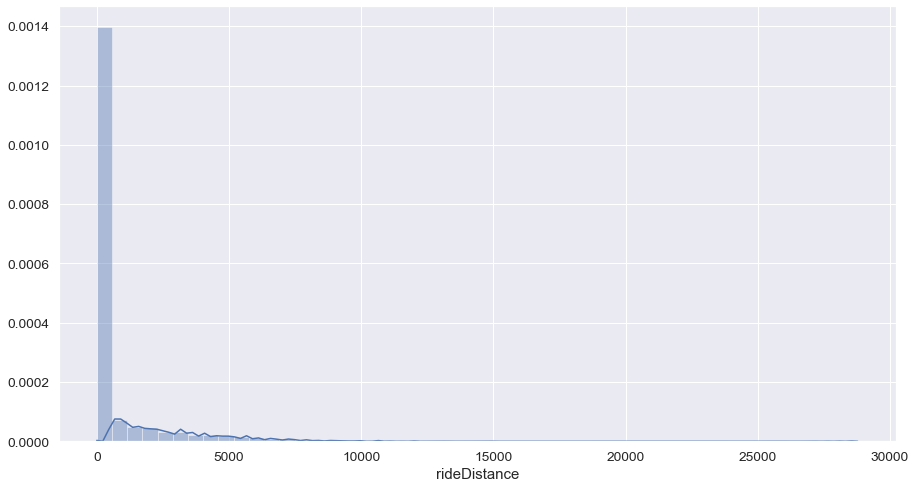

In [59]:
show_distplot('rideDistance')

In [60]:
#Travel Lust and Wandrer ---> They just play to roam around and explore places without killing anyone - How can you ride for 30km?
train[(train['rideDistance'] >= 30000) & (train['kills'] == 0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving


In [61]:
# How is it even possible that a player is able to ride and kill without walking even a single meter ?
train[(train['walkDistance'] == 0) & (train['rideDistance'] > 0) & (train['kills'] > 0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving


In [62]:
# What was the player doing in the game when total distance travelled by him/her is 0? 
train[(train['_totalDistance'] == 0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
0,2f262dd9795e60,78437bcd91d40e,d5db3a49eb2955,0,0,0.000000,0,0,0,92,...,0.0,0,0,0.0,0,1470,0.0,0.0,0.0,False
47,e1a33d9ceb6001,b49e417c45cd05,4c66508a276eb2,0,0,0.000000,0,0,0,91,...,0.0,0,0,0.0,0,1516,0.0,0.0,0.0,False
102,4de600bc8a8948,b0e4523cf9156d,6b3c15eba7dd6b,0,0,0.000000,0,0,0,91,...,0.0,0,0,0.0,0,0,0.0,0.0,0.0,False
157,0b482fe1d6083f,eb7625629003db,02c5c6b9032eb7,0,0,0.000000,0,0,0,95,...,0.0,0,0,0.0,0,0,0.0,0.0,0.0,False
167,78397213f0d61e,2a67fb2610a273,887236b98822a1,0,0,0.000000,0,0,0,87,...,0.0,0,0,0.0,0,0,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9703,902420427840ee,8e6dad004ce975,1878ddfa711536,0,0,0.000000,0,0,0,15,...,0.0,0,0,0.0,0,0,0.0,0.0,0.0,False
9760,5df9bdd583d064,e985176cd8db41,d043dc27463023,0,0,0.000000,0,0,0,9,...,0.0,0,0,0.0,10,0,0.0,0.0,0.0,False
9803,2ff0f9d6a74f55,68aca15d91ffee,f608026fa632b5,0,0,0.000000,0,0,0,85,...,0.0,0,0,0.0,0,1502,0.0,0.0,0.0,False
9906,0fb43813af0bc0,7b1989f3ff05ed,0a62c402607a71,0,0,0.000000,0,0,0,90,...,0.0,0,0,0.0,0,1550,0.0,0.0,0.0,False


In [63]:
# Drop riding anomalies
train.drop(train[(train['rideDistance'] >= 30000) & (train['kills'] == 0)].index, inplace = True)
train.drop(train[(train['walkDistance'] == 0) & (train['rideDistance'] > 0) & (train['kills'] > 0)].index, inplace = True)
train.drop(train[(train['_totalDistance'] == 0)].index, inplace=True)

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

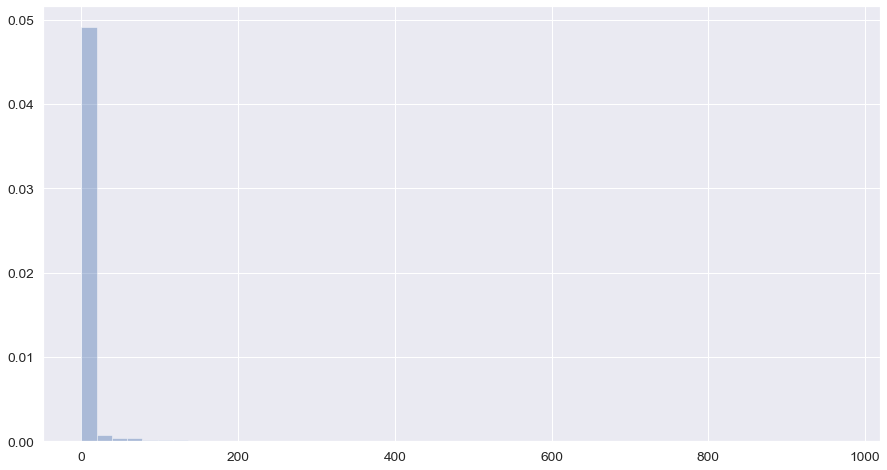

In [64]:
show_distplot('swimDistance')

In [65]:
# How can you swim for more than 2 km without breathing?
train[train['swimDistance'] >= 2000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving


In [66]:
# Remove outliers
train.drop(train[train['swimDistance'] >= 2000].index, inplace=True)

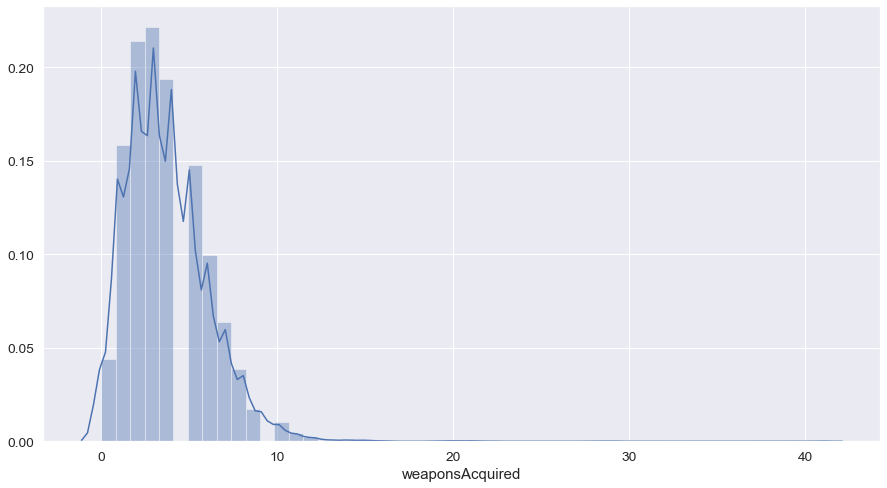

In [67]:
show_distplot('weaponsAcquired')

In [68]:
display(train[train['weaponsAcquired'] >= 80].shape)
train[train['weaponsAcquired'] >= 80].head()

(0, 32)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving


In [69]:
# Remove outliers
train.drop(train[train['weaponsAcquired'] >= 80].index, inplace=True)

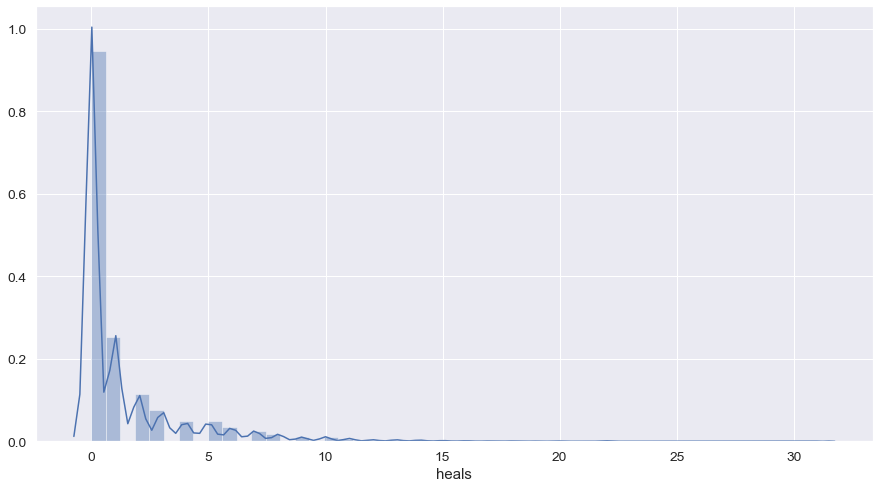

In [70]:
show_distplot('heals')

In [71]:
# 40 or more healing items used
display(train[train['heals'] >= 40].shape)
train[train['heals'] >= 40].head(10)

(0, 32)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving


In [72]:
# Remove outliers
train.drop(train[train['heals'] >= 40].index, inplace=True)

In [73]:
train.shape

(9770, 32)